In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from scipy.stats import uniform, randint
from imblearn.over_sampling import SMOTE
import pickle

Loading and Initial Inspection of Data

In [2]:
df=pd.read_csv('Data/Assignment_Train.csv')
df.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NAME                  

In [4]:
df.duplicated().sum()

9

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df["Application Status"] = df["Application Status"].map({"APPROVED": 1, "DECLINED": 0}).astype(int)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DEALER ID,9991.0,1.029396e+05,3.784682e+04,4.984900e+04,7.991100e+04,9.463100e+04,1.084685e+05,2.026160e+05
mobile,9991.0,8.630080e+09,1.077281e+09,6.000042e+09,7.894906e+09,8.867158e+09,9.588138e+09,9.999977e+09
TOTAL ASSET COST,4892.0,9.761252e+04,1.674503e+04,5.187300e+04,8.842550e+04,9.440000e+04,1.034992e+05,2.411160e+05
ASSET MODEL NO,9991.0,1.506647e+05,2.085112e+04,1.245870e+05,1.395420e+05,1.432380e+05,1.602160e+05,2.018970e+05
APPLIED AMOUNT,9991.0,9.178659e+04,2.700520e+04,1.040000e+04,8.000000e+04,9.000000e+04,9.900000e+04,1.420000e+06
DOB,9991.0,9.816493e+06,8.930721e+06,1.011943e+06,1.012000e+06,7.121976e+06,1.605197e+07,3.112200e+07
AGE,9991.0,3.179522e+01,1.120409e+01,0.000000e+00,2.500000e+01,3.100000e+01,3.900000e+01,7.900000e+01
Phone Social Premium.a23games,1.0,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Phone Social Premium.amazon,8076.0,4.866270e-01,4.998521e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Phone Social Premium.byjus,8044.0,1.498011e-01,3.568985e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [8]:
df.isnull().sum()

DEALER ID                                 0
APPLICATION LOGIN DATE                    0
HDB BRANCH NAME                           1
HDB BRANCH STATE                        853
FIRST NAME                                0
MIDDLE NAME                            7138
LAST NAME                               681
mobile                                    0
AADHAR VERIFIED                           0
Cibil Score                            4292
MOBILE VERIFICATION                       0
DEALER NAME                               4
TOTAL ASSET COST                       5099
ASSET CTG                              5099
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
Personal Email Address                    0
MARITAL STATUS                         4885
GENDER                                    0
DOB                                       0
AGE                             

Data Cleaning and Preprocessing

Dropping columns which have more than 80% of missing values

In [9]:
columns_to_drop = df.columns[(df.isnull().sum() / len(df)) > 0.80 ]
df.drop(columns_to_drop, axis=1, inplace=True)
columns_to_drop

Index(['Phone Social Premium.a23games', 'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jiomart', 'Phone Social Premium.my11',
       'Phone Social Premium.rummycircle', 'Phone Social Premium.whatsapp',
       'Phone Social Premium.yatra'],
      dtype='object')

In [10]:
df

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,1.0,0.0,0.0,1.0,0.0,5324.0,67.222222,High,1
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1998.0,100.000000,High,1
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.000000,Low,1
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,1.0,0.0,0.0,1.0,0.0,1998.0,72.777778,High,1
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,1.0,0.0,0.0,1.0,0.0,1998.0,68.095238,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,105101,07/11/22,FARRUKHABAD-SF,UTTAR PRADESH,AJAY,NaN,NARESH,8400644964,NO,NaN,...,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,60.576923,Medium,1
9996,85054,07/04/22,BHAGALPUR-SF,BIHAR,SURESH,KUMAR,PRASAD,9708883564,NO,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1998.0,71.078431,High,1
9997,53710,07/10/22,LUDHIANA-SF,PUNJAB,SANJAY,NaN,AAGAN,9888532016,NO,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1988.0,100.000000,Medium,1
9998,89240,07/29/2022,MEERUT-SF,UTTAR PRADESH,SANJAY,NaN,SINGH,8923338426,NO,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1096.0,-1.000000,Low,1


Deleting the rows of those columns which contains less than 1% of missing data

In [11]:
rows_to_drop=df.columns[(df.isnull().sum() / len(df)) < 0.01 ]
df.dropna(subset=rows_to_drop, inplace=True)
rows_to_drop

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME', 'FIRST NAME',
       'mobile', 'AADHAR VERIFIED', 'MOBILE VERIFICATION', 'DEALER NAME',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'GENDER', 'DOB',
       'AGE', 'name', 'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall', 'Application Status'],
      dtype='object')

In [12]:
df

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,1.0,0.0,0.0,1.0,0.0,5324.0,67.222222,High,1
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1998.0,100.000000,High,1
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.000000,Low,1
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,1.0,0.0,0.0,1.0,0.0,1998.0,72.777778,High,1
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,1.0,0.0,0.0,1.0,0.0,1998.0,68.095238,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,105101,07/11/22,FARRUKHABAD-SF,UTTAR PRADESH,AJAY,NaN,NARESH,8400644964,NO,NaN,...,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,60.576923,Medium,1
9996,85054,07/04/22,BHAGALPUR-SF,BIHAR,SURESH,KUMAR,PRASAD,9708883564,NO,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1998.0,71.078431,High,1
9997,53710,07/10/22,LUDHIANA-SF,PUNJAB,SANJAY,NaN,AAGAN,9888532016,NO,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1988.0,100.000000,Medium,1
9998,89240,07/29/2022,MEERUT-SF,UTTAR PRADESH,SANJAY,NaN,SINGH,8923338426,NO,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1096.0,-1.000000,Low,1


Selecting and removing the columns which are not required in the model training

The login date- year and month is same for all the rows it does not play any role for loan prediction


DOB is not required as we already have Agee column 

In [13]:
columns_to_remove=['APPLICATION LOGIN DATE','FIRST NAME','MIDDLE NAME','LAST NAME','mobile','Personal Email Address','DOB','Pan Name','name','upi_name']
df.drop(columns=columns_to_remove,inplace=True)

In [14]:
df['Cibil Score'].unique()

array(['726', nan, '737', '713', '669', '762', '798', '521', '615', '573',
       '661', '700', '753', '719', '751', '599', '681', '769', '747',
       '785', '611', '760', '632', '775', '677', '682', '766', '767',
       '724', '605', '684', '639', '732', '718', '744', '728', '670',
       '740', '727', '705', '585', '601', '649', '765', '794', '742',
       '763', '609', '786', '668', '650', '600', '741', '672', '736',
       '621', '746', '694', '715', '697', '761', '679', '641', '720',
       '578', '780', '730', '734', '722', '619', '754', '620', '665',
       '750', '790', '735', '663', '667', '680', '638', '745', '708',
       '752', '707', '612', '791', '768', '652', '690', '654', '606',
       '771', '567', '764', '788', '711', '580', '712', '738', '689',
       '776', '778', '673', '743', '644', '801', '721', '546', '635',
       '607', '602', '725', '749', '782', '643', '541', 'NO RESPONSE',
       '759', '653', '795', '688', '678', '755', '553', '617', '647',
       '748', 

changing the data type of cibil score to  integer and handling the str data inside  the cibil score column

In [15]:
df['Cibil Score'] = pd.to_numeric(df['Cibil Score'], errors='coerce')  # Convert to numeric, coercing non-numeric values to NaN


In [16]:
df['AADHAR VERIFIED'].unique()

array(['NO'], dtype=object)

In [17]:
df['MOBILE VERIFICATION'].unique()

array([ True])

Generally, a column containing only one type of data will not contribute significantly to model training.

In [18]:
df.drop(columns=['AADHAR VERIFIED','MOBILE VERIFICATION'],inplace=True)

In [19]:
df.isnull().sum()

DEALER ID                                 0
HDB BRANCH NAME                           0
HDB BRANCH STATE                        849
Cibil Score                            4322
DEALER NAME                               0
TOTAL ASSET COST                       5090
ASSET CTG                              5090
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
MARITAL STATUS                         4876
GENDER                                    0
AGE                                       0
ADDRESS TYPE                           3300
EMPLOY CONSTITUTION                    4980
EMPLOYER NAME                          4992
EMPLOYER TYPE                          4980
vpa                                    2774
Phone Social Premium.amazon            1914
Phone Social Premium.byjus             1946
Phone Social Premium.flipkart          1830
Phone Social Premium.housing    

In [20]:
df['AGE'].unique()


array([44, 25, 22, 24, 33, 32, 30,  0, 27, 39, 19, 37, 21, 34, 35, 31, 50,
       48, 26, 29, 41, 46, 52, 28, 56, 38, 49, 36, 42, 47, 23, 54, 20, 43,
       59, 57, 45, 40, 53, 55, 51, 60, 58, 61, 63, 68, 18, 62, 69, 64, 17,
       67, 66, 79], dtype=int64)

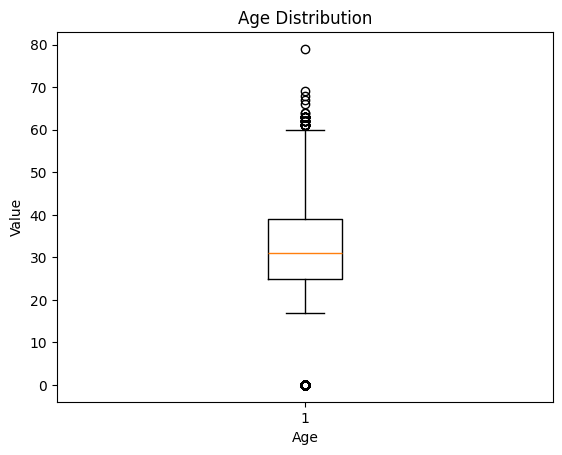

In [21]:
# Create a box plot
plt.boxplot(df['AGE'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Value")
plt.show()

Replacing the Age=0 with the median of the Age bcaause age 0 is not possible

In [22]:
df['AGE'] = df['AGE'].replace(0, df['AGE'].median())

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            9980 non-null   int64  
 1   HDB BRANCH NAME                      9980 non-null   object 
 2   HDB BRANCH STATE                     9131 non-null   object 
 3   Cibil Score                          5658 non-null   float64
 4   DEALER NAME                          9980 non-null   object 
 5   TOTAL ASSET COST                     4890 non-null   float64
 6   ASSET CTG                            4890 non-null   object 
 7   ASSET MODEL NO                       9980 non-null   int64  
 8   APPLIED AMOUNT                       9980 non-null   int64  
 9   PRIMARY ASSET MAKE                   9980 non-null   object 
 10  Primary Asset Model No               9980 non-null   object 
 11  MARITAL STATUS                     

In [24]:
# Separate object and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include='number').columns

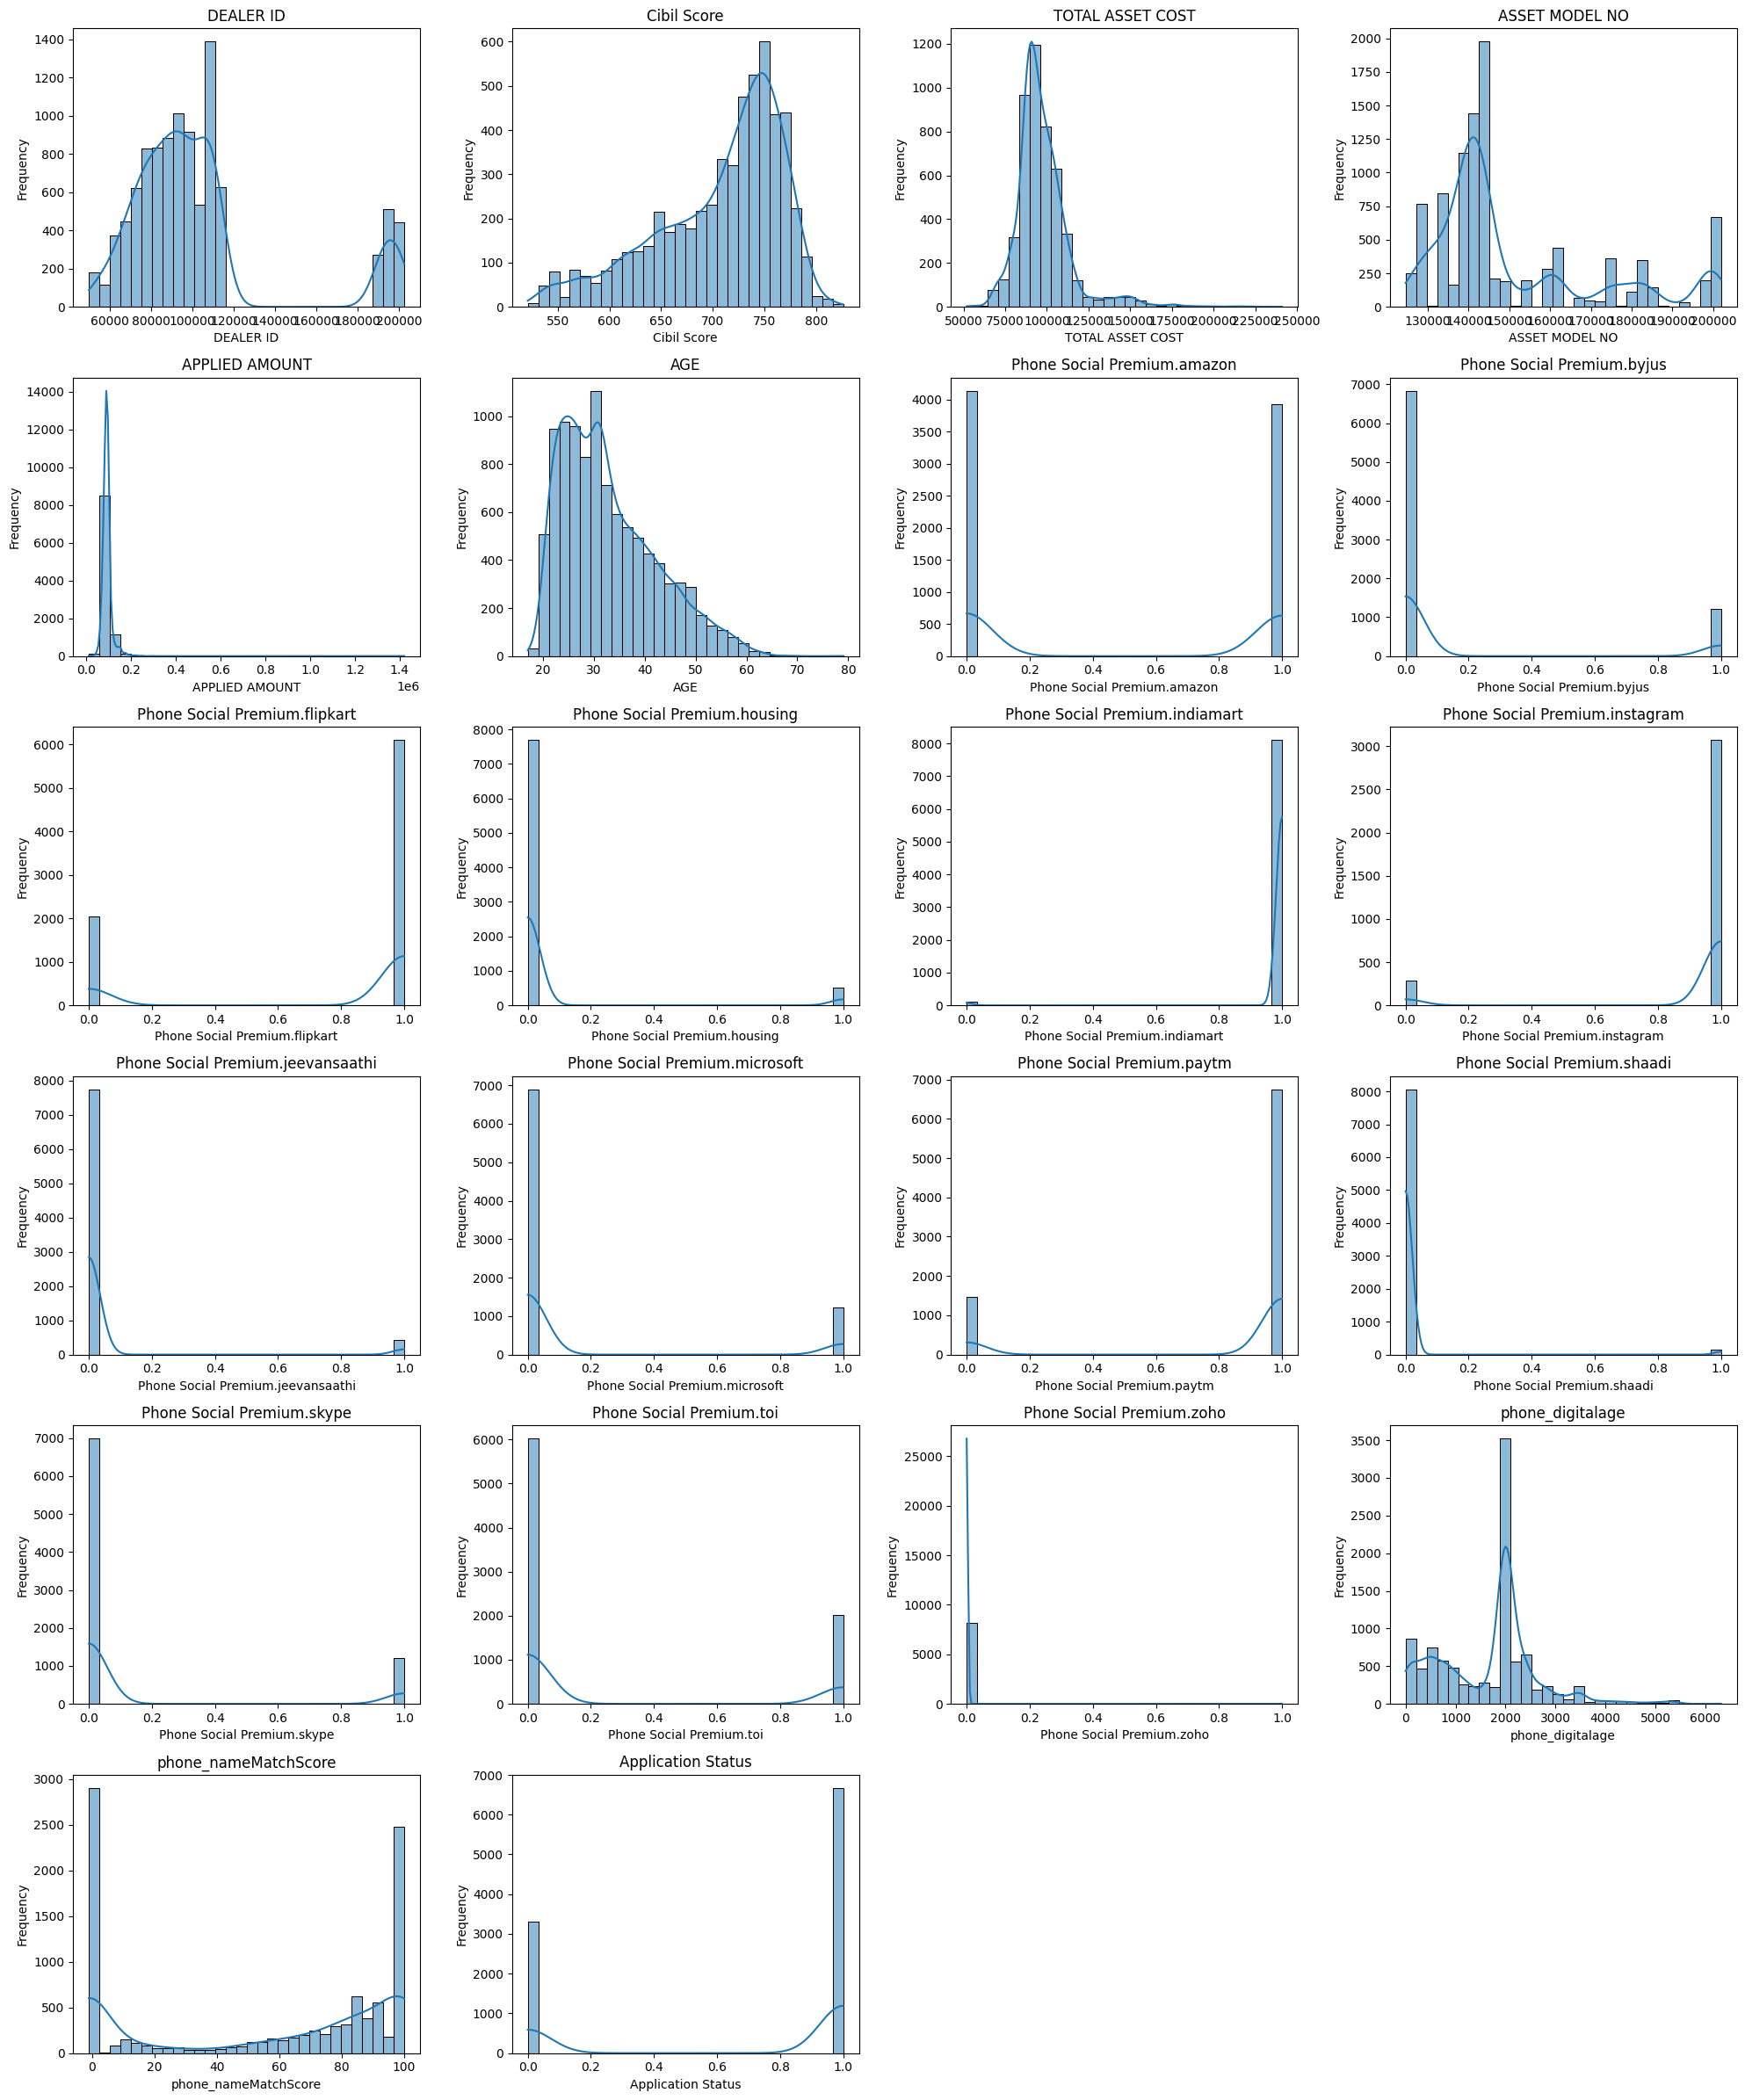

In [25]:

# Number of columns for the subplots
num_cols = 4

# Number of rows needed
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot histograms and KDEs
for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col], kde=True, ax=ax, bins=30, edgecolor='black')
    ax.set_title(f"{col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:

# Check value counts of object columns
for col in numerical_cols:
    print(f"Value counts of {col}:")
    print(df[col].value_counts())
    print('*'*100)

Value counts of DEALER ID:
DEALER ID
112006    75
88282     51
77503     39
79245     38
94718     37
          ..
55335      1
199676     1
79895      1
68123      1
105111     1
Name: count, Length: 2411, dtype: int64
****************************************************************************************************
Value counts of Cibil Score:
Cibil Score
752.0    105
726.0     91
743.0     88
746.0     87
767.0     81
        ... 
577.0      1
556.0      1
586.0      1
570.0      1
817.0      1
Name: count, Length: 265, dtype: int64
****************************************************************************************************
Value counts of TOTAL ASSET COST:
TOTAL ASSET COST
98000.0     13
106500.0    12
98300.0     11
94000.0     10
104000.0    10
            ..
112231.0     1
150340.0     1
86743.0      1
103013.0     1
101262.0     1
Name: count, Length: 3690, dtype: int64
***************************************************************************************************

In [27]:
df[numerical_cols].isnull().sum()

DEALER ID                               0
Cibil Score                          4322
TOTAL ASSET COST                     5090
ASSET MODEL NO                          0
APPLIED AMOUNT                          0
AGE                                     0
Phone Social Premium.amazon          1914
Phone Social Premium.byjus           1946
Phone Social Premium.flipkart        1830
Phone Social Premium.housing         1774
Phone Social Premium.indiamart       1773
Phone Social Premium.instagram       6623
Phone Social Premium.jeevansaathi    1827
Phone Social Premium.microsoft       1870
Phone Social Premium.paytm           1755
Phone Social Premium.shaadi          1777
Phone Social Premium.skype           1783
Phone Social Premium.toi             1940
Phone Social Premium.zoho            1780
phone_digitalage                        0
phone_nameMatchScore                    0
Application Status                      0
dtype: int64

Handling Missing Values for Numerical Data

Replacing with median so that the values are not effect by the outlier if present

In [28]:
asset_cost_median=df['TOTAL ASSET COST'].median()
cibil_median=df['Cibil Score'].median()
cibil_median,asset_cost_median

(725.0, 94404.0)

In [29]:
df['TOTAL ASSET COST'] = df['TOTAL ASSET COST'].fillna(asset_cost_median)
df['Cibil Score'] = df['Cibil Score'].fillna(cibil_median)


Replacing binary numerical columns with Random values from the column itself bcoz the number of missing
values are much greater to replace with mode otherwise it will bring inconsistency in the Data 

In [30]:
for col in numerical_cols:
    unique_values = df[col].dropna().unique()
    random_values = np.random.choice(unique_values, size=df[col].isnull().sum())
    df.loc[df[col].isnull(), col] = random_values

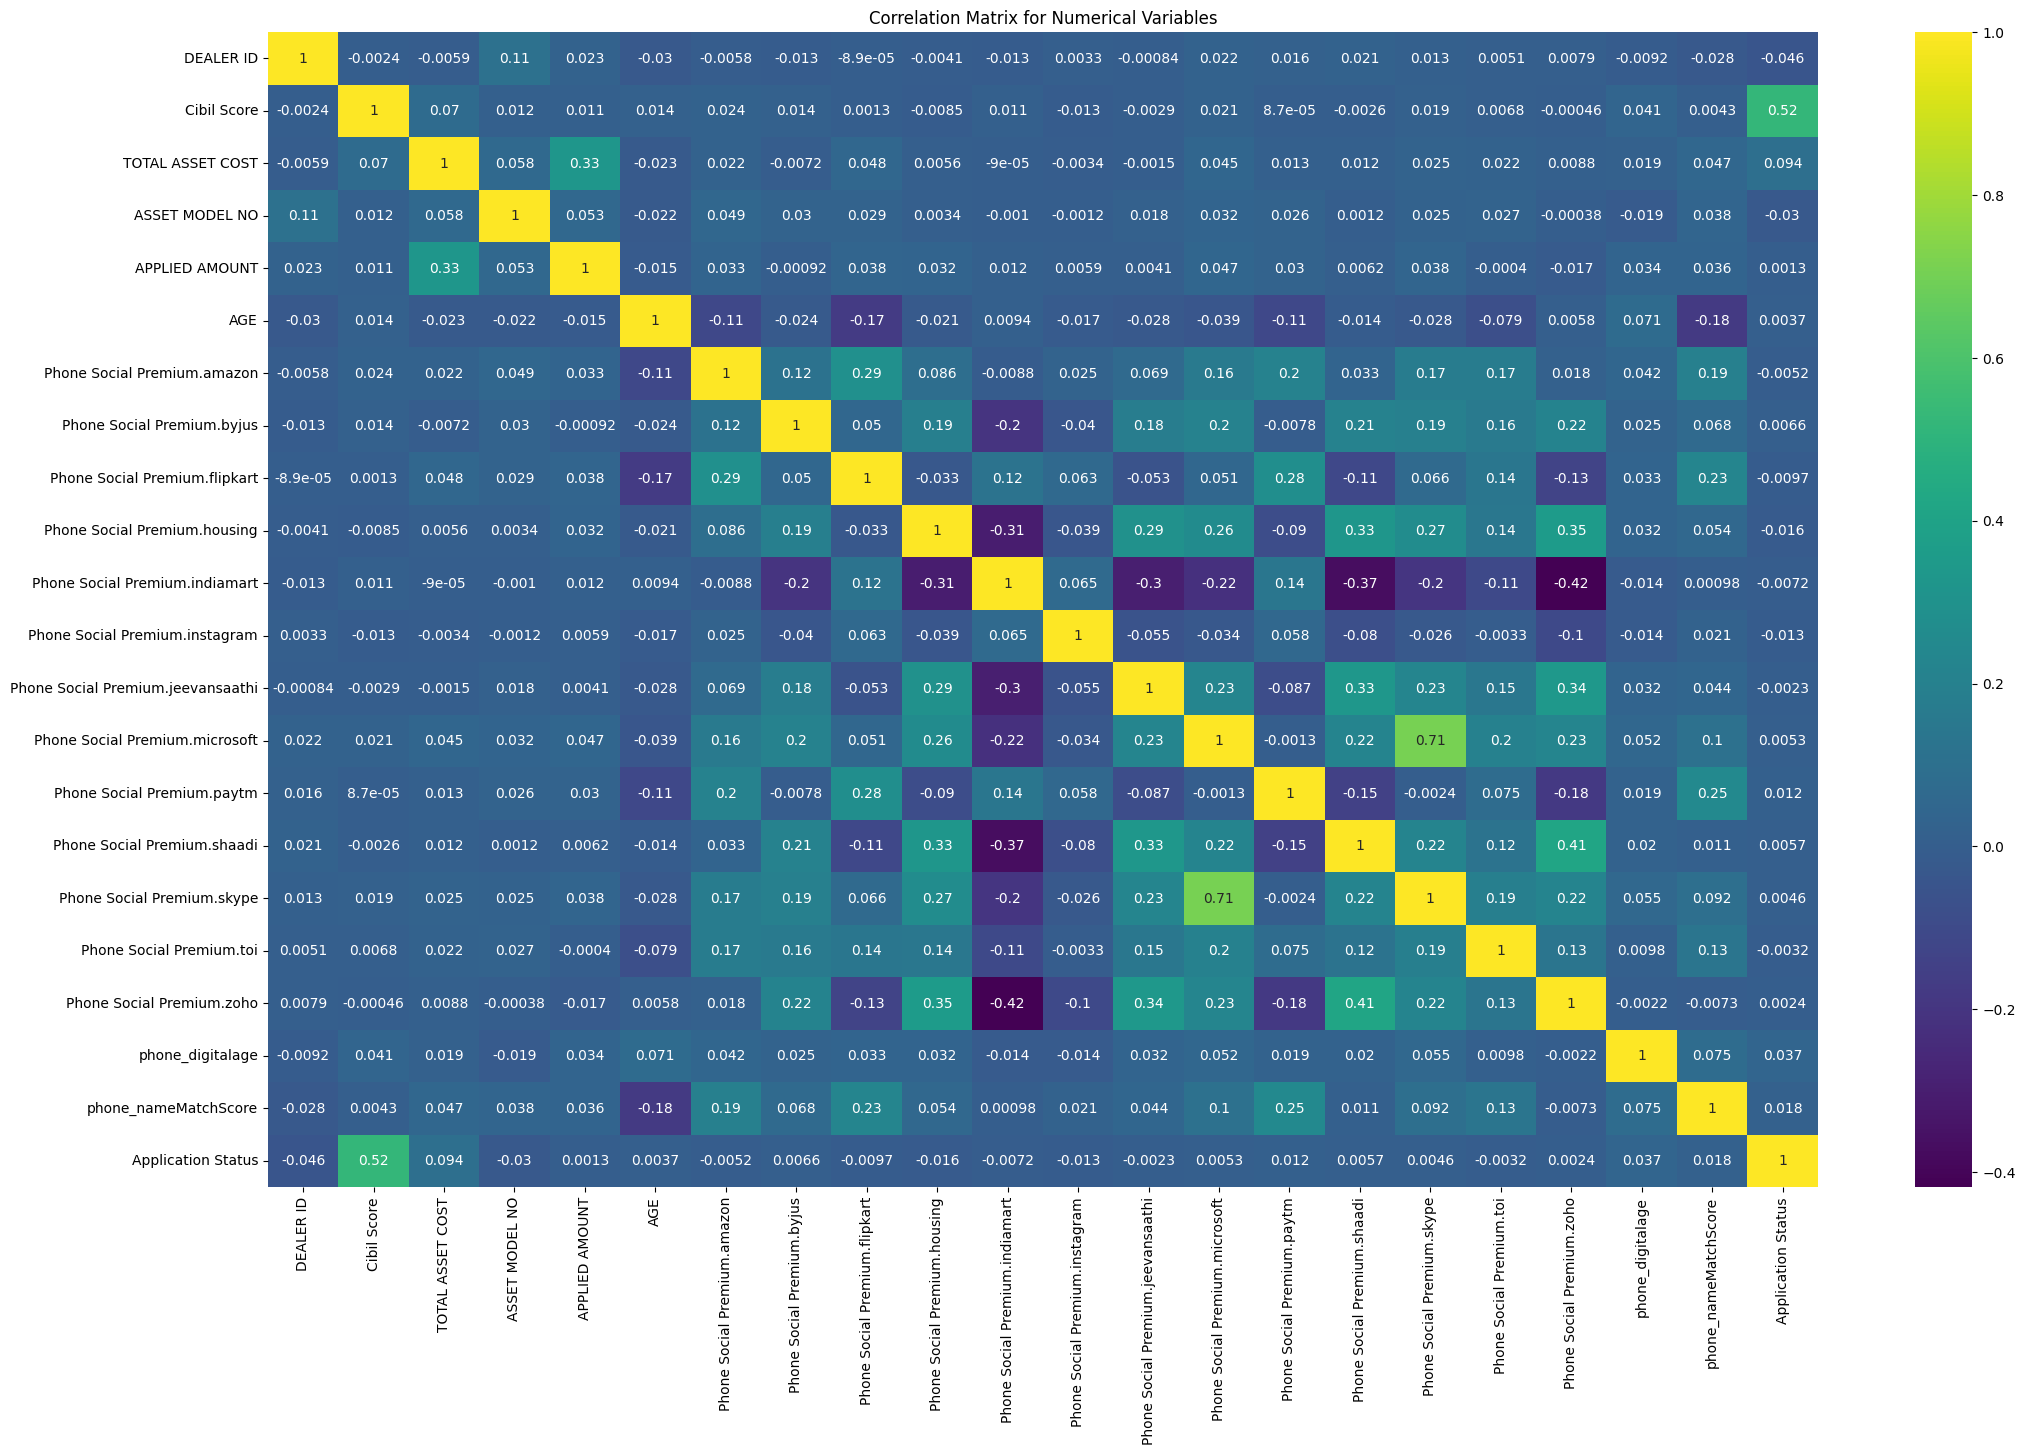

In [31]:
# Correlation for numerical columns
plt.figure(figsize=(25,15))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()


In [32]:
df[numerical_cols].isnull().sum()

DEALER ID                            0
Cibil Score                          0
TOTAL ASSET COST                     0
ASSET MODEL NO                       0
APPLIED AMOUNT                       0
AGE                                  0
Phone Social Premium.amazon          0
Phone Social Premium.byjus           0
Phone Social Premium.flipkart        0
Phone Social Premium.housing         0
Phone Social Premium.indiamart       0
Phone Social Premium.instagram       0
Phone Social Premium.jeevansaathi    0
Phone Social Premium.microsoft       0
Phone Social Premium.paytm           0
Phone Social Premium.shaadi          0
Phone Social Premium.skype           0
Phone Social Premium.toi             0
Phone Social Premium.zoho            0
phone_digitalage                     0
phone_nameMatchScore                 0
Application Status                   0
dtype: int64

In [33]:
cor=df[numerical_cols].corr()['Application Status']
cor

DEALER ID                           -0.046099
Cibil Score                          0.523383
TOTAL ASSET COST                     0.093753
ASSET MODEL NO                      -0.029528
APPLIED AMOUNT                       0.001306
AGE                                  0.003688
Phone Social Premium.amazon         -0.005250
Phone Social Premium.byjus           0.006575
Phone Social Premium.flipkart       -0.009727
Phone Social Premium.housing        -0.016464
Phone Social Premium.indiamart      -0.007170
Phone Social Premium.instagram      -0.013166
Phone Social Premium.jeevansaathi   -0.002261
Phone Social Premium.microsoft       0.005303
Phone Social Premium.paytm           0.011704
Phone Social Premium.shaadi          0.005719
Phone Social Premium.skype           0.004606
Phone Social Premium.toi            -0.003180
Phone Social Premium.zoho            0.002390
phone_digitalage                     0.036862
phone_nameMatchScore                 0.017519
Application Status                

Handling Missing Values for Categorical Data

In [34]:
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   HDB BRANCH NAME                      9980 non-null   object
 1   HDB BRANCH STATE                     9131 non-null   object
 2   DEALER NAME                          9980 non-null   object
 3   ASSET CTG                            4890 non-null   object
 4   PRIMARY ASSET MAKE                   9980 non-null   object
 5   Primary Asset Model No               9980 non-null   object
 6   MARITAL STATUS                       5104 non-null   object
 7   GENDER                               9980 non-null   object
 8   ADDRESS TYPE                         6680 non-null   object
 9   EMPLOY CONSTITUTION                  5000 non-null   object
 10  EMPLOYER NAME                        4988 non-null   object
 11  EMPLOYER TYPE                        5000 non-nu

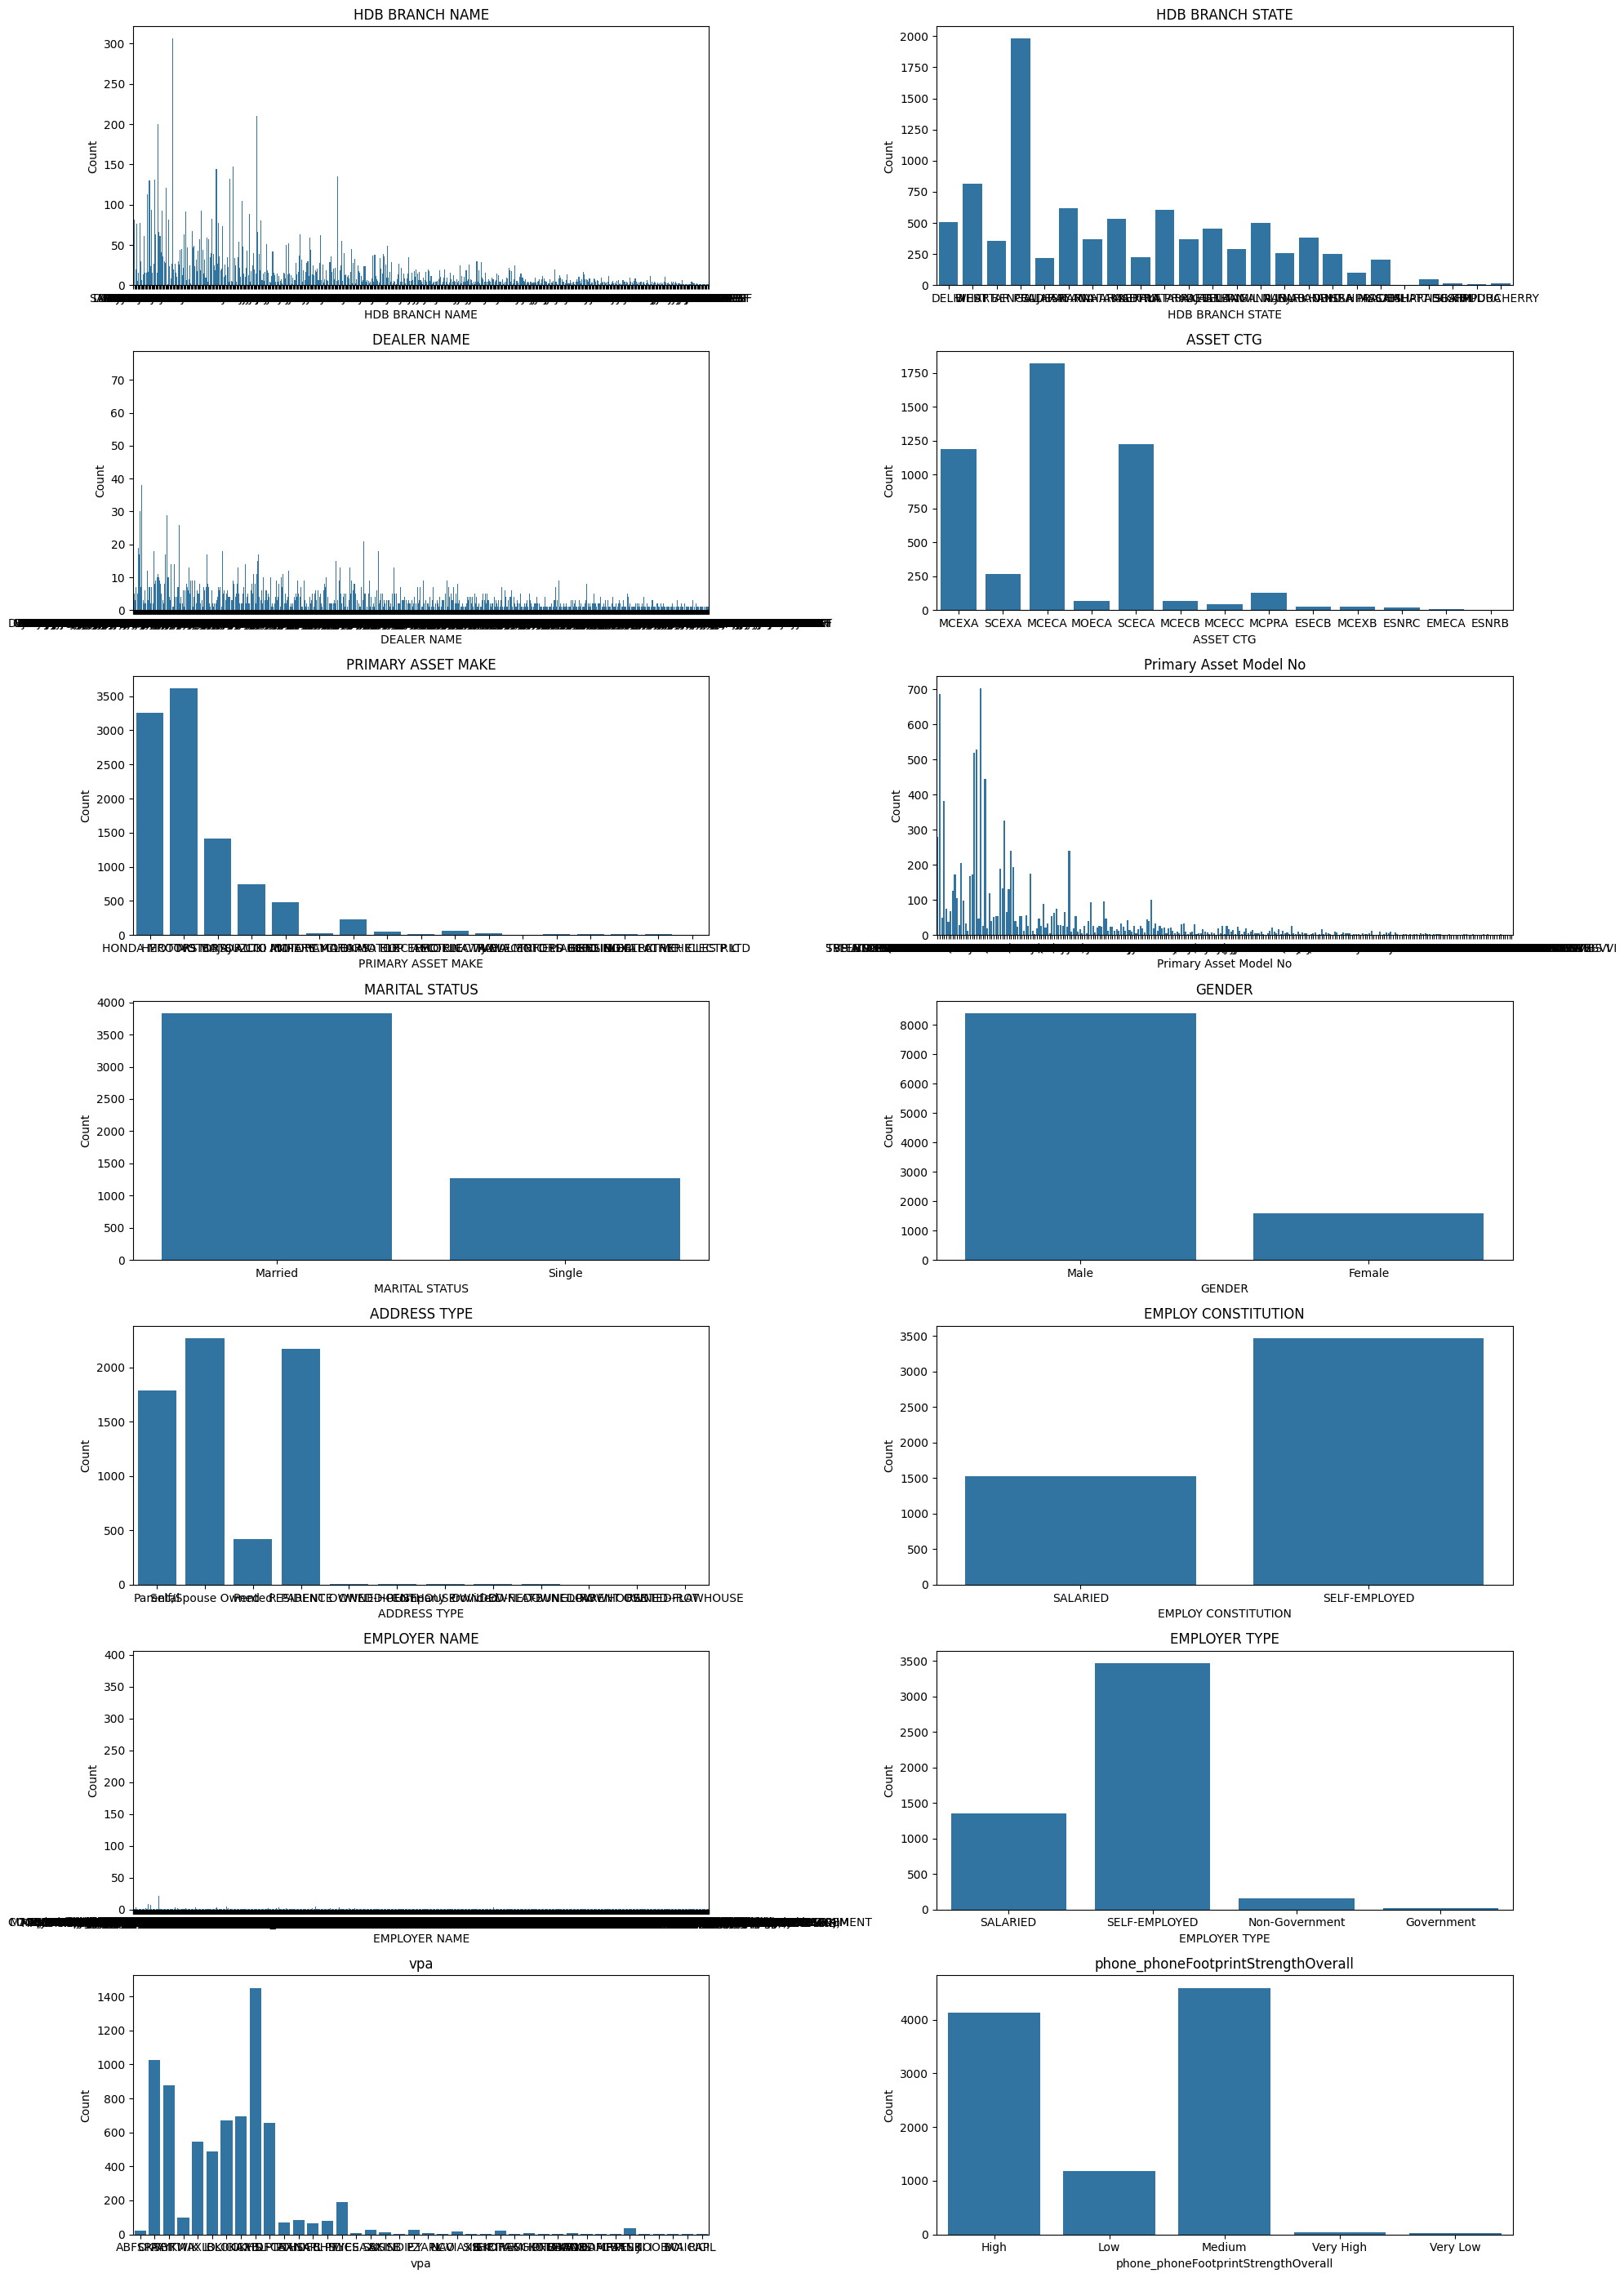

In [35]:
num_cols = 2

# Calculate the number of rows needed
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot count plots
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f"{col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

# Hide any unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [36]:
df[categorical_cols].isnull().sum()

HDB BRANCH NAME                           0
HDB BRANCH STATE                        849
DEALER NAME                               0
ASSET CTG                              5090
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
MARITAL STATUS                         4876
GENDER                                    0
ADDRESS TYPE                           3300
EMPLOY CONSTITUTION                    4980
EMPLOYER NAME                          4992
EMPLOYER TYPE                          4980
vpa                                    2774
phone_phoneFootprintStrengthOverall       0
dtype: int64

In [37]:

# Check value counts of object columns
for col in categorical_cols:
    print(f"Value counts of {col}:")
    print(df[col].unique())
    print('*'*100)

Value counts of HDB BRANCH NAME:
['DELHI-SF' 'PATNA-SF' 'DARJEELING-SF' 'SAHARANPUR-SF' 'MODASA-SF'
 'RAMPUR-SF' 'DELHI EAST-SF' 'MIRZAPUR-SF' 'JIND-SF' 'NAWADA-SF'
 'VARANASI-SF' 'BHIWANI-SF' 'BELLARY-SF' 'MEERUT-SF' 'INDAPUR-SF'
 'LUCKNOW-SF' 'TIRUR-SF' 'GURGAON-SF' 'HOSHNGABAD-SF' 'SASARAM-SF'
 'BHOPAL-SF' 'GREATER NOIDA-SF' 'CHHAPARA-SF' 'DEHRADUN-SF' 'DARBHANGA-SF'
 'SAHARSA-SF' 'FAIZABAD-SF' 'MUZAFFARNAGAR-SF' 'JALNA-SF' 'NAGAUR-SF'
 'KURUKSHETRA-SF' 'KOLKATA-SF' 'GODAVARIKHANI-SF' 'AZAMGARH-SF'
 'KUMBAKONAM-SF' 'PRATAPGARH UP-SF' 'SITAPUR-SF' 'NOIDA-SF' 'SIRSA-SF'
 'AHMEDABAD-SF' 'GONDA-SF' 'DAVANAGERE-SF' 'CHAPRA-SF' 'FEROZEPUR-SF'
 'RANCHI-SF' 'HARIDWAR-SF' 'BARIPADA-SF' 'BASTI-SF' 'PUNE-SF'
 'LUDHIANA-SF' 'MADURAI-SF' 'JHANSI-SF' 'POKHRAN-SF' 'KOCHI-SF'
 'TADEPALLIGUDEM-SF' 'MOTIHARI-SF' 'ALWAR-SF' 'MUZZAFARPUR-SF'
 'RUDRAPUR-SF' 'KARNAL-SF' 'LALITPUR-SF' 'KOTA-SF' 'GWALIOR-SF'
 'MOHALI-SF' 'GIRIDIH-SF' 'JHUMRI TILAIYA-SF' 'BARAMATI-SF' 'AMRAVATI-SF'
 'DHAMNOD-SF' 'AURANGABAD

Replacing categorical columns with Random values from the column itself bcoz the number of missing
values are much greater to replace with mode otherwise it will bring inconsistency in the Data 

In [38]:
for col in categorical_cols:
    unique_values = df[col].dropna().unique()
    random_values = np.random.choice(unique_values, size=df[col].isnull().sum())
    df.loc[df[col].isnull(), col] = random_values

In [39]:
df[categorical_cols].isnull().sum()

HDB BRANCH NAME                        0
HDB BRANCH STATE                       0
DEALER NAME                            0
ASSET CTG                              0
PRIMARY ASSET MAKE                     0
Primary Asset Model No                 0
MARITAL STATUS                         0
GENDER                                 0
ADDRESS TYPE                           0
EMPLOY CONSTITUTION                    0
EMPLOYER NAME                          0
EMPLOYER TYPE                          0
vpa                                    0
phone_phoneFootprintStrengthOverall    0
dtype: int64

Label Encoding for Categorical Features

In [40]:
categorical_cols

Index(['HDB BRANCH NAME', 'HDB BRANCH STATE', 'DEALER NAME', 'ASSET CTG',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No', 'MARITAL STATUS',
       'GENDER', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME',
       'EMPLOYER TYPE', 'vpa', 'phone_phoneFootprintStrengthOverall'],
      dtype='object')

In [41]:
df_temp=df.copy()

In [42]:
df_temp

,DEALER ID,HDB BRANCH NAME,HDB BRANCH STATE,Cibil Score,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,...,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,DELHI-SF,DELHI,726.0,V D AUTO WHEELS CHHOTIAL,95041.0,MCEXA,139542,85000,HONDA MOTORS,...,0.0,1.0,0.0,0.0,1.0,0.0,5324.0,67.222222,High,1
1,108975,PATNA-SF,BIHAR,725.0,CHANDAN AUTOMOBILES 259 KGS TOWER,94404.0,EMECA,140208,90000,HERO MOTORS,...,0.0,1.0,0.0,0.0,0.0,0.0,1998.0,100.000000,High,1
2,111004,DARJEELING-SF,WEST BENGAL,737.0,KN VISION 53HILL CART ROAD,119436.0,SCEXA,160001,75000,TVS MOTOR CO,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.000000,Low,1
3,192020,SAHARANPUR-SF,UTTAR PRADESH,713.0,MAHADEV AUTOMOBILES MANGLAUR,87000.0,MCECA,160832,78500,HERO MOTORS,...,0.0,1.0,0.0,0.0,1.0,0.0,1998.0,72.777778,High,1
4,55095,MODASA-SF,GUJARAT,669.0,DWARKESH AUTO SHAMLAJI ROAD,94404.0,ESNRC,174641,70000,HONDA MOTORS,...,0.0,1.0,0.0,0.0,1.0,0.0,1998.0,68.095238,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,105101,FARRUKHABAD-SF,UTTAR PRADESH,725.0,GUPTA AUTO DEALERS BARHPUR,88970.0,MCECA,160832,87000,HERO MOTORS,...,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,60.576923,Medium,1
9996,85054,BHAGALPUR-SF,BIHAR,725.0,RAMESHWARAM ENTERPRISES DR R P ROAD,120000.0,MCEXA,183085,90000,TVS MOTOR CO,...,0.0,1.0,0.0,0.0,0.0,0.0,1998.0,71.078431,High,1
9997,53710,LUDHIANA-SF,PUNJAB,725.0,SHREE DADU AUTOS P L GANDHI NGR,89929.0,SCECA,143240,89000,HONDA MOTORS,...,0.0,1.0,0.0,0.0,0.0,0.0,1988.0,100.000000,Medium,1
9998,89240,MEERUT-SF,UTTAR PRADESH,725.0,SHREE SHIV SHAKTI AUTOMOTIVE RORKRD,89340.0,MCECA,160832,85000,HERO MOTORS,...,0.0,0.0,0.0,0.0,0.0,0.0,1096.0,-1.000000,Low,1


Label Encoding for Categorical Features in Temp DataFrame

In [43]:
encoder1 = LabelEncoder()
for col in categorical_cols:
    df_temp[col] = encoder1.fit_transform(df_temp[col])

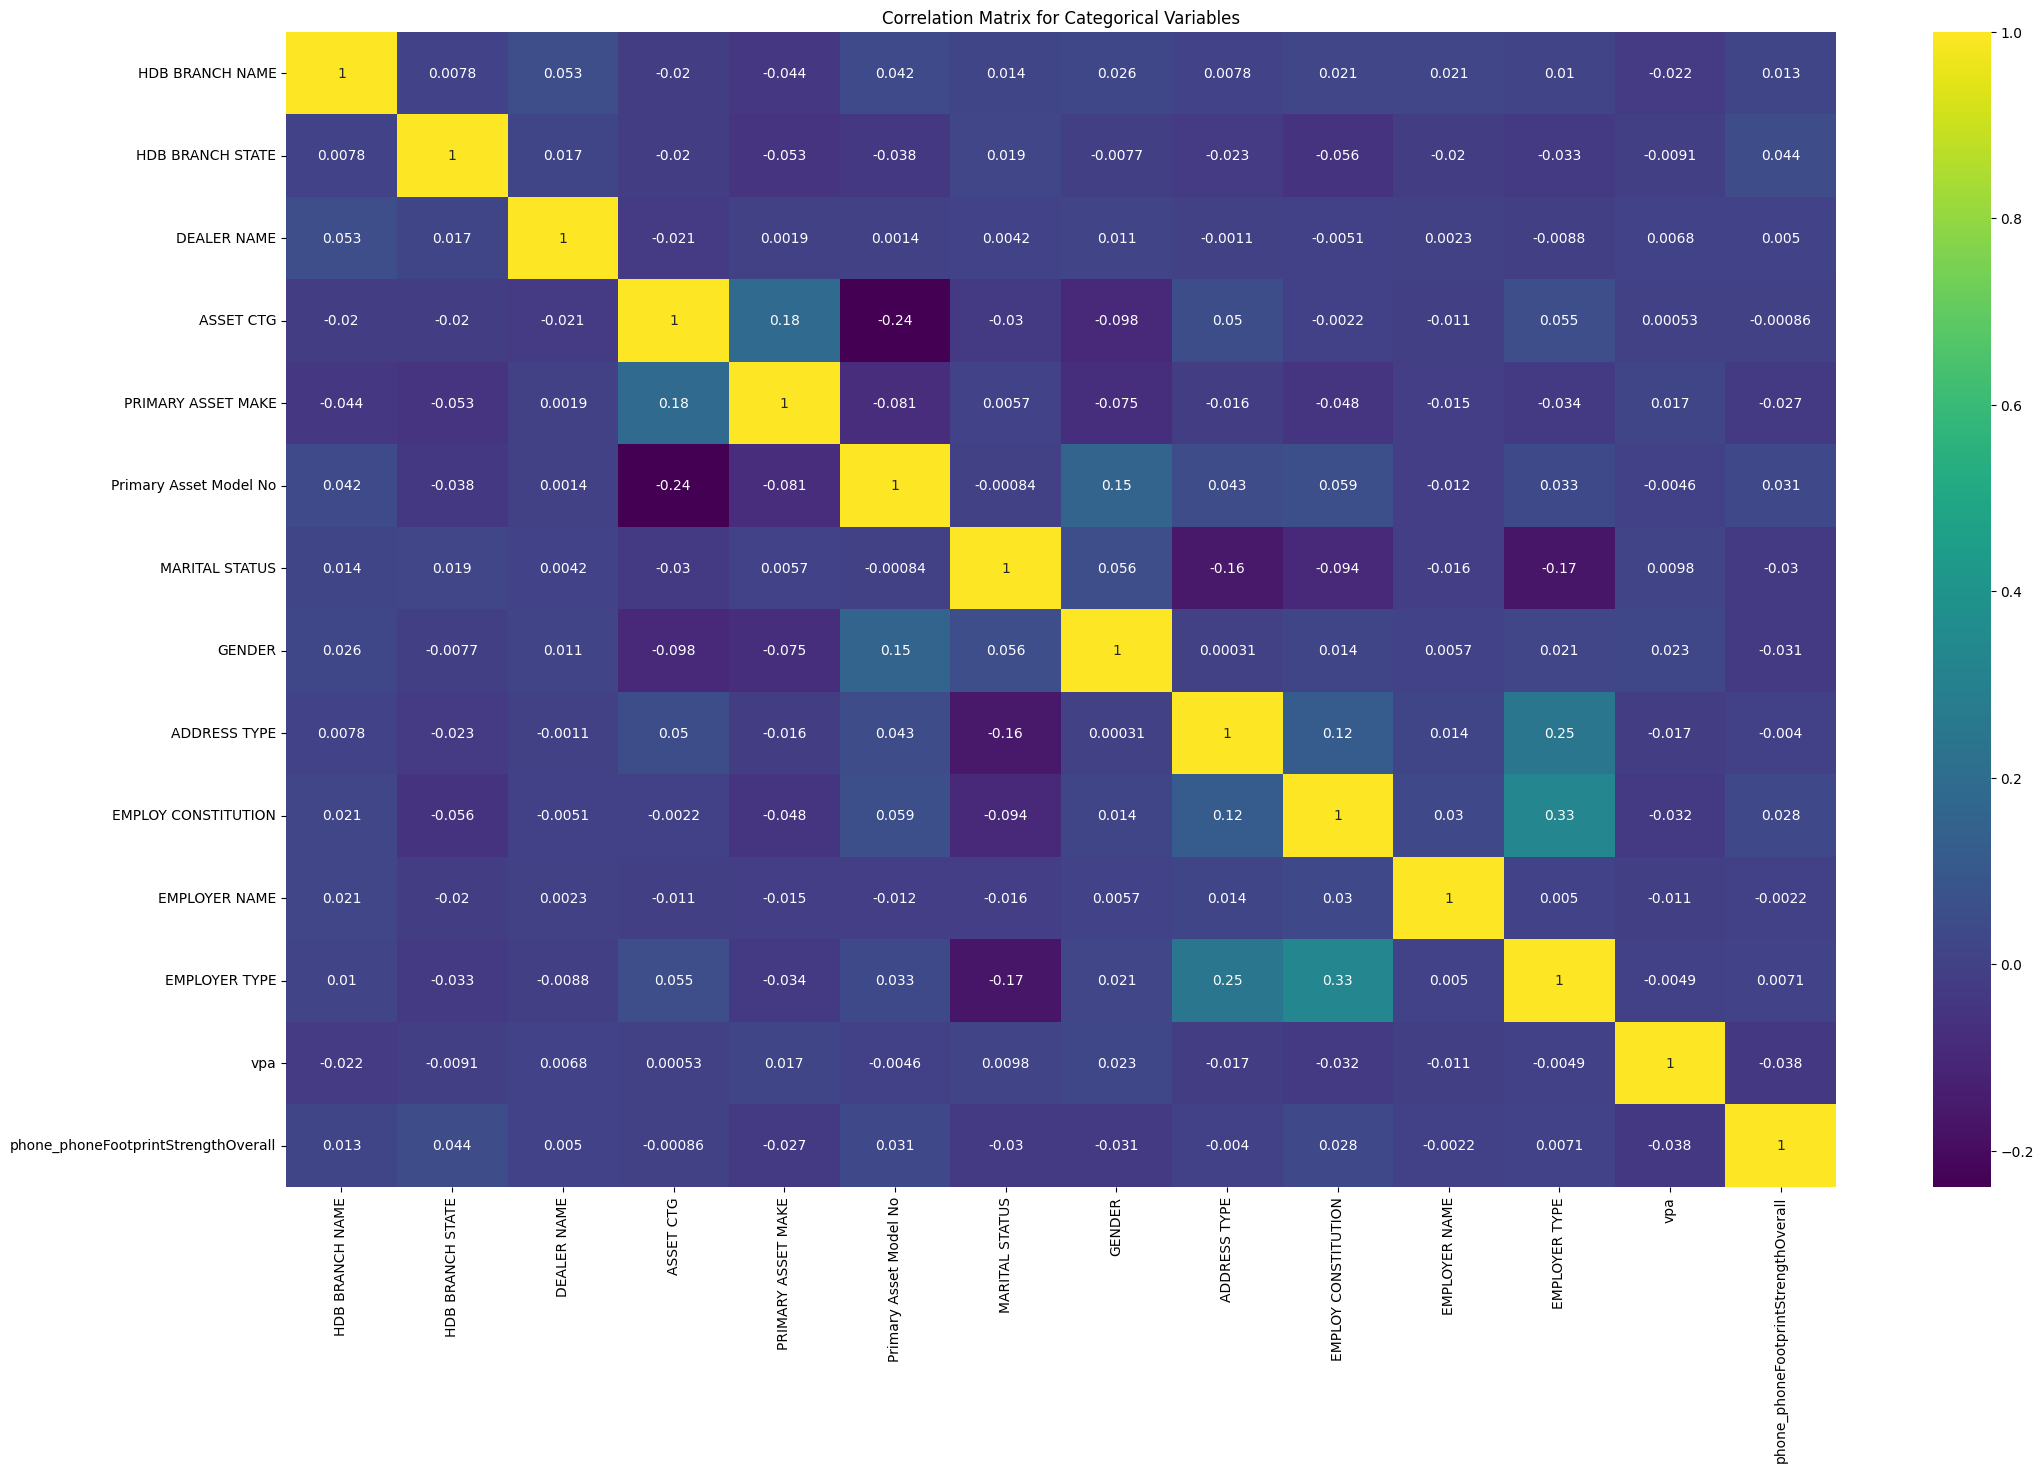

In [44]:
# Correlation for numerical columns
plt.figure(figsize=(25,15))
correlation_matrix = df_temp[categorical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation Matrix for Categorical Variables")
plt.show()


In [45]:
df_temp.isnull().sum()

DEALER ID                              0
HDB BRANCH NAME                        0
HDB BRANCH STATE                       0
Cibil Score                            0
DEALER NAME                            0
TOTAL ASSET COST                       0
ASSET CTG                              0
ASSET MODEL NO                         0
APPLIED AMOUNT                         0
PRIMARY ASSET MAKE                     0
Primary Asset Model No                 0
MARITAL STATUS                         0
GENDER                                 0
AGE                                    0
ADDRESS TYPE                           0
EMPLOY CONSTITUTION                    0
EMPLOYER NAME                          0
EMPLOYER TYPE                          0
vpa                                    0
Phone Social Premium.amazon            0
Phone Social Premium.byjus             0
Phone Social Premium.flipkart          0
Phone Social Premium.housing           0
Phone Social Premium.indiamart         0
Phone Social Pre

In [46]:
cor=df_temp.corr()['Application Status']
cor

DEALER ID                             -0.046099
HDB BRANCH NAME                        0.015742
HDB BRANCH STATE                       0.004818
Cibil Score                            0.523383
DEALER NAME                           -0.008590
TOTAL ASSET COST                       0.093753
ASSET CTG                              0.103275
ASSET MODEL NO                        -0.029528
APPLIED AMOUNT                         0.001306
PRIMARY ASSET MAKE                    -0.002705
Primary Asset Model No                 0.003079
MARITAL STATUS                        -0.175415
GENDER                                 0.024906
AGE                                    0.003688
ADDRESS TYPE                           0.297760
EMPLOY CONSTITUTION                    0.144471
EMPLOYER NAME                          0.006409
EMPLOYER TYPE                          0.383039
vpa                                   -0.017831
Phone Social Premium.amazon           -0.005250
Phone Social Premium.byjus             0

Feature Selection Based on Correlation

In [47]:
# Filter columns with correlation greater than 0.02
columns_with_high_correlation =cor [abs(cor) > 0.02]
columns_with_high_correlation

DEALER ID             -0.046099
Cibil Score            0.523383
TOTAL ASSET COST       0.093753
ASSET CTG              0.103275
ASSET MODEL NO        -0.029528
MARITAL STATUS        -0.175415
GENDER                 0.024906
ADDRESS TYPE           0.297760
EMPLOY CONSTITUTION    0.144471
EMPLOYER TYPE          0.383039
phone_digitalage       0.036862
Application Status     1.000000
Name: Application Status, dtype: float64

In [48]:
column_names = columns_with_high_correlation.index.tolist()
column_names

['DEALER ID',
 'Cibil Score',
 'TOTAL ASSET COST',
 'ASSET CTG',
 'ASSET MODEL NO',
 'MARITAL STATUS',
 'GENDER',
 'ADDRESS TYPE',
 'EMPLOY CONSTITUTION',
 'EMPLOYER TYPE',
 'phone_digitalage',
 'Application Status']

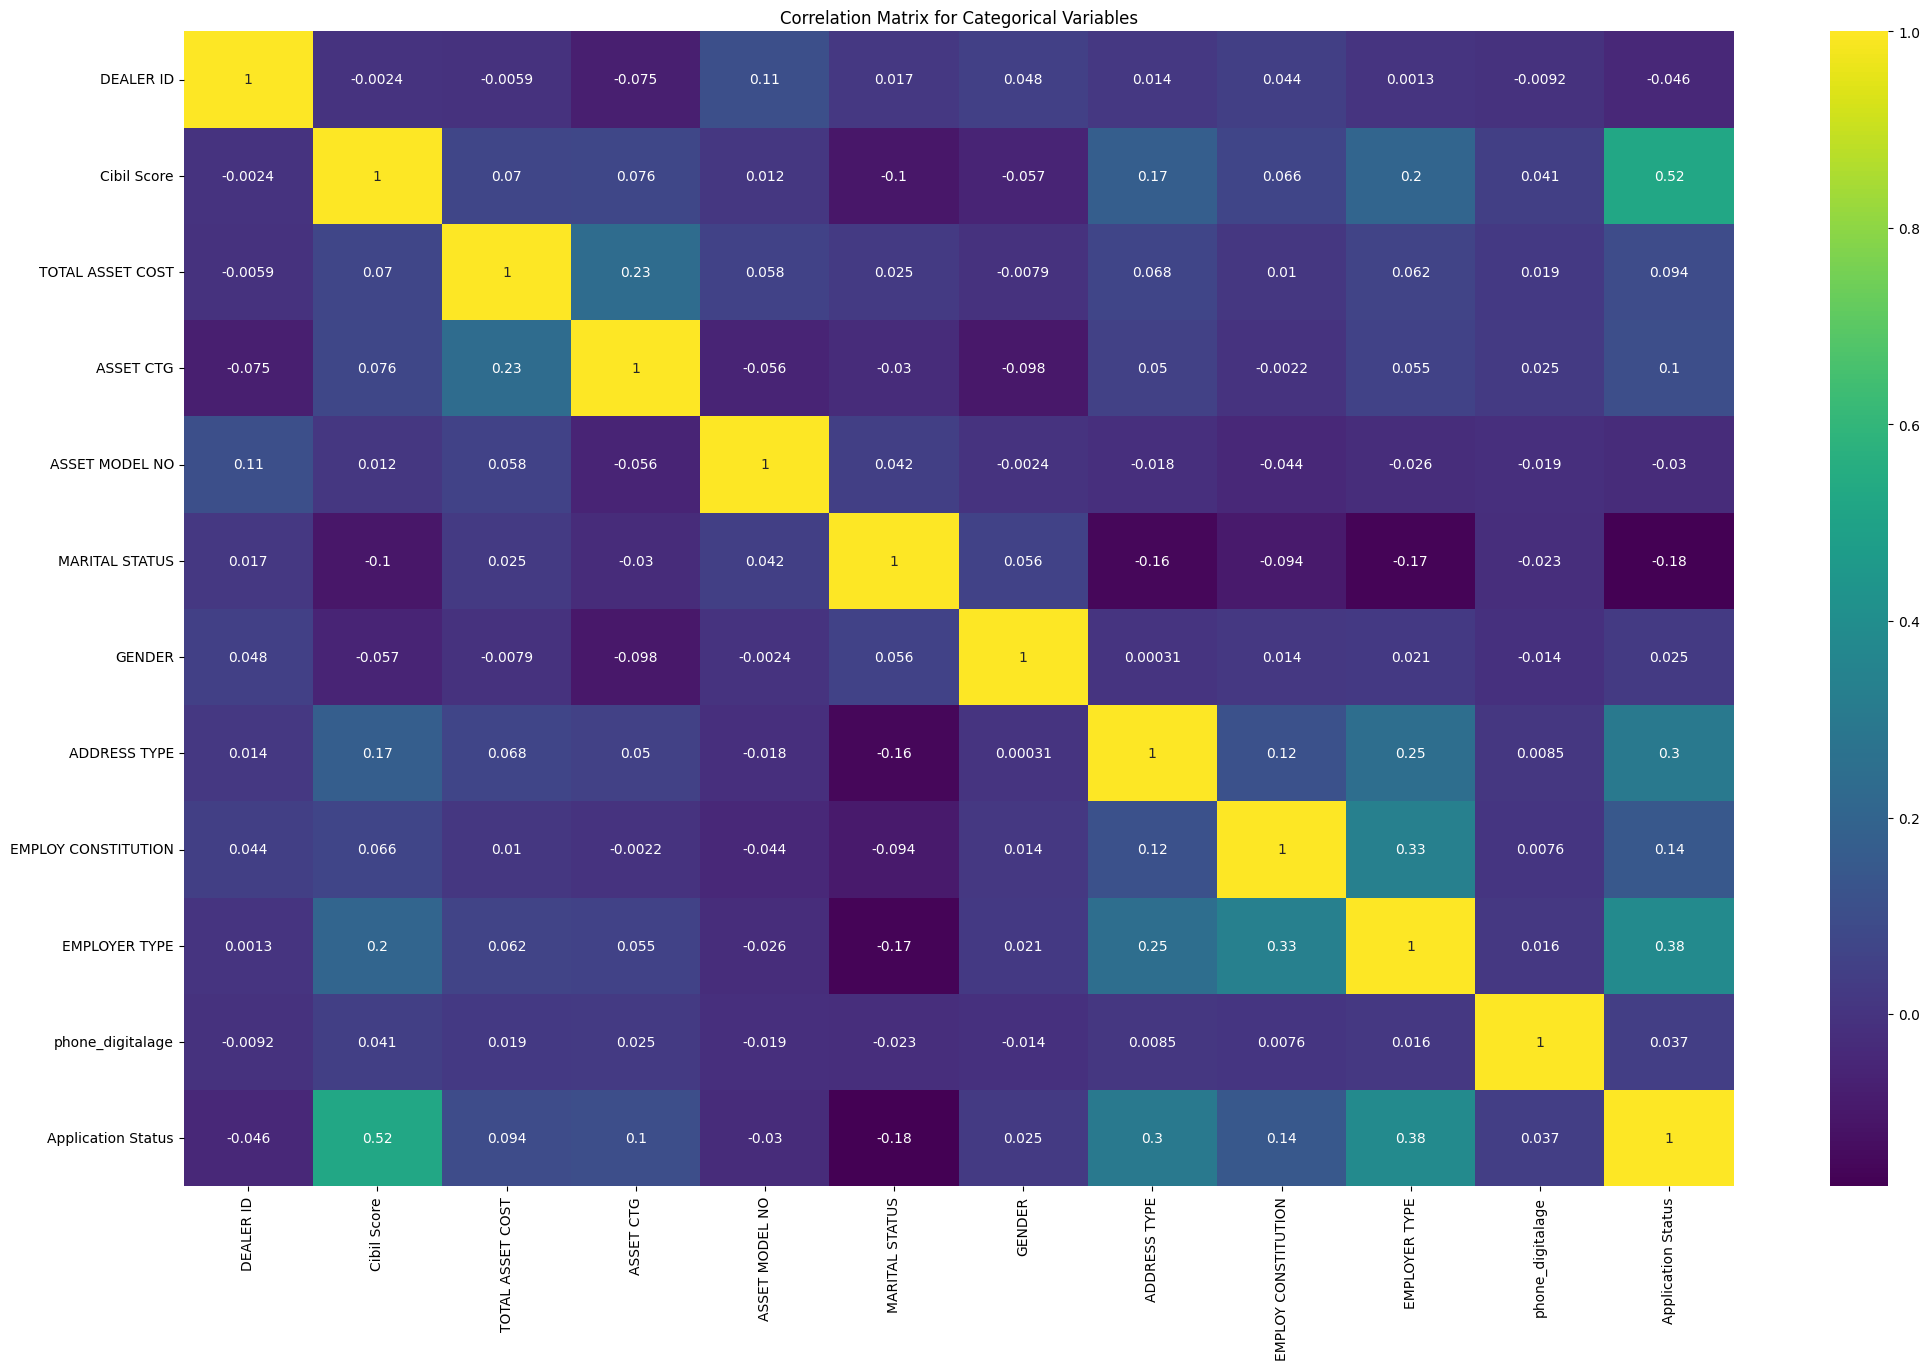

In [49]:
# Correlation for numerical columns
plt.figure(figsize=(25,15))
correlation_matrix = df_temp[column_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation Matrix for Categorical Variables")
plt.show()


In [50]:
df_new=df[column_names]
df_new

,DEALER ID,Cibil Score,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,MARITAL STATUS,GENDER,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER TYPE,phone_digitalage,Application Status
0,106989,726.0,95041.0,MCEXA,139542,Married,Male,Parental,SALARIED,SALARIED,5324.0,1
1,108975,725.0,94404.0,EMECA,140208,Married,Male,Self/Spouse Owned,SELF-EMPLOYED,Non-Government,1998.0,1
2,111004,737.0,119436.0,SCEXA,160001,Single,Male,Self/Spouse Owned,SELF-EMPLOYED,SELF-EMPLOYED,-1.0,1
3,192020,713.0,87000.0,MCECA,160832,Single,Male,Parental,SELF-EMPLOYED,SELF-EMPLOYED,1998.0,1
4,55095,669.0,94404.0,ESNRC,174641,Married,Male,Rented,SELF-EMPLOYED,SALARIED,1998.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,105101,725.0,88970.0,MCECA,160832,Married,Male,Parental,SALARIED,SALARIED,-1.0,1
9996,85054,725.0,120000.0,MCEXA,183085,Married,Male,Self/Spouse Owned,SELF-EMPLOYED,SELF-EMPLOYED,1998.0,1
9997,53710,725.0,89929.0,SCECA,143240,Married,Male,Rented,SELF-EMPLOYED,SELF-EMPLOYED,1988.0,1
9998,89240,725.0,89340.0,MCECA,160832,Married,Male,Self/Spouse Owned,SELF-EMPLOYED,SELF-EMPLOYED,1096.0,1


Saving the cleaned Train data selected for model traning

In [51]:
df_new.to_csv("cleaned_dataset/cleaned_trian_data.csv",index=False)

In [52]:
X=df_new.drop(columns=['Application Status'])
y=df_new['Application Status']

Label Encoding the cleaned DataFrame for model Training

In [53]:
label_encoders={}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

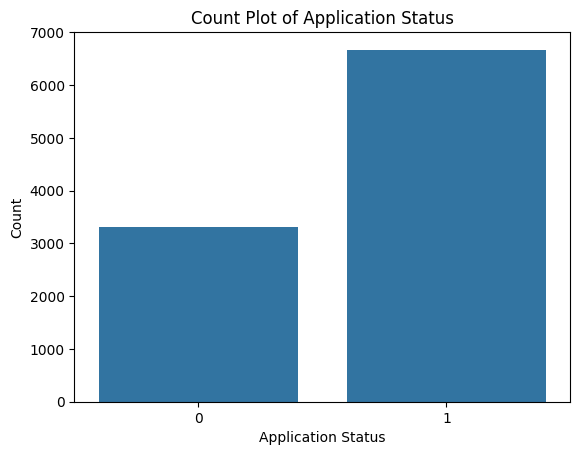

In [54]:
sns.countplot(x='Application Status', data=df_new)
plt.title('Count Plot of Application Status')
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.show()

AS we can see above the classed are imbalance Will use SMOTE to balance the Classes for better Model training

## SMOTE

In [55]:
X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)

Checking if Normalization of data is required or not using Skew

In [56]:
X_res.skew()

DEALER ID              1.580971
Cibil Score           -1.229889
TOTAL ASSET COST       4.185775
ASSET CTG              0.000375
ASSET MODEL NO         1.210234
MARITAL STATUS         0.667729
GENDER                -1.512045
ADDRESS TYPE          -0.883909
EMPLOY CONSTITUTION   -0.003897
EMPLOYER TYPE         -0.451032
phone_digitalage       0.356579
dtype: float64

 Data Splitting for Training and Validation

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [58]:
X_train.shape, y_train.shape

((10676, 11), (10676,))

In [59]:
y_val.value_counts()

Application Status
1    1348
0    1322
Name: count, dtype: int64

Model Training with Pipelines

In [60]:
# Define model pipelines
models = {
    'Logistic Regression': Pipeline([('lr', LogisticRegression())]),
    'Naive Bayes': Pipeline([('nb', GaussianNB())]),
    'SVC': Pipeline([('svc', SVC(kernel='linear'))]),
    'Random Forest': Pipeline([('rf', RandomForestClassifier())]),
    'Gradient Boosting': Pipeline([('gb', GradientBoostingClassifier())]),
    'XGBoost': Pipeline([('xgb', XGBClassifier())])
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)

# Predict on validation data
predictions = {name: model.predict(X_val) for name, model in models.items()}

c:\Users\ARISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Define function to calculate and display evaluation metrics
def evaluate_model(y_true, y_pred):
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print(f"classification report:\n{classification_report(y_true, y_pred)}")

# Evaluate all models
for name, preds in predictions.items():
    print(f"\n------{name}--------")
    evaluate_model(y_val, preds)



------Logistic Regression--------
Confusion Matrix:
[[875 447]
 [349 999]]
classification report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.69      1322
           1       0.69      0.74      0.72      1348

    accuracy                           0.70      2670
   macro avg       0.70      0.70      0.70      2670
weighted avg       0.70      0.70      0.70      2670


------Naive Bayes--------
Confusion Matrix:
[[1322    0]
 [ 342 1006]]
classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.89      1322
           1       1.00      0.75      0.85      1348

    accuracy                           0.87      2670
   macro avg       0.90      0.87      0.87      2670
weighted avg       0.90      0.87      0.87      2670


------SVC--------
Confusion Matrix:
[[ 870  452]
 [ 141 1207]]
classification report:
              precision    recall  f1-score   support

          

### RandomForestClassifier, GradientBoostingClassifier and XGradientBoostingClassifier are working good lets hyperparameter tune them

Hyperparameter Tuning with RandomizedSearchCV

Random Forest tuning

In [62]:
# new
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2']  # Removed 'auto'
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=rf_param_dist,
                                      n_iter=20, scoring='f1', cv=5, verbose=3, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

# Print best parameters and evaluate
best_rf = random_search_rf.best_estimator_
print("Best Parameters for Random Forest:", random_search_rf.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Random Forest: {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 100}


 Gradient Boosting tuning

In [63]:
gb_param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.7, 0.3)
}

random_search_gb = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=gb_param_dist,
                                      n_iter=20, scoring='f1', cv=5, verbose=3, n_jobs=-1, random_state=42)
random_search_gb.fit(X_train, y_train)
best_gb = random_search_gb.best_estimator_
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.29184968246925674, 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 144, 'subsample': 0.976562270506935}


XGradient Boosting tuning


In [64]:
xgb_param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 200),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.5, 0.5),  # Fixed range to be within [0, 1]
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}


random_search_xgb = RandomizedSearchCV(XGBClassifier(), param_distributions=xgb_param_dist,
                                       n_iter=20, scoring='f1', cv=5, verbose=3, n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_
print("Best Parameters for XGradient Boosting:", random_search_xgb.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for XGradient Boosting: {'colsample_bytree': 0.7117007403531848, 'gamma': 0.19744075908778486, 'learning_rate': 0.09804645241541143, 'max_depth': 9, 'n_estimators': 188, 'reg_alpha': 0.19884240408880516, 'reg_lambda': 0.71134195274865, 'subsample': 0.9370526621593617}


In [65]:
print("\nBest Random Forest Model:Accuracy on training data")
evaluate_model(y_train, best_rf.predict(X_train))

print("*"*100)

print("\nBest Random Forest Model:Accuracy on validation data")
evaluate_model(y_val, best_rf.predict(X_val))


Best Random Forest Model:Accuracy on training data
Confusion Matrix:
[[5306   45]
 [ 439 4886]]
classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5351
           1       0.99      0.92      0.95      5325

    accuracy                           0.95     10676
   macro avg       0.96      0.95      0.95     10676
weighted avg       0.96      0.95      0.95     10676

****************************************************************************************************

Best Random Forest Model:Accuracy on validation data
Confusion Matrix:
[[1238   84]
 [ 210 1138]]
classification report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1322
           1       0.93      0.84      0.89      1348

    accuracy                           0.89      2670
   macro avg       0.89      0.89      0.89      2670
weighted avg       0.89      0.89      0.89      2670



In [66]:
print("\nBest Gradient Boosting Model:Accuracy on training data")
evaluate_model(y_train, best_gb.predict(X_train))

print("*"*100)

print("\nBest Gradient Boosting Model:Accuracy on validation data")
evaluate_model(y_val, best_gb.predict(X_val))


Best Gradient Boosting Model:Accuracy on training data
Confusion Matrix:
[[5351    0]
 [   0 5325]]
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5351
           1       1.00      1.00      1.00      5325

    accuracy                           1.00     10676
   macro avg       1.00      1.00      1.00     10676
weighted avg       1.00      1.00      1.00     10676

****************************************************************************************************

Best Gradient Boosting Model:Accuracy on validation data
Confusion Matrix:
[[1207  115]
 [ 164 1184]]
classification report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1322
           1       0.91      0.88      0.89      1348

    accuracy                           0.90      2670
   macro avg       0.90      0.90      0.90      2670
weighted avg       0.90      0.90      0.90      2

In [67]:
print("\nBest XGRADIENT Boosting Model:Accuracy on training data")
evaluate_model(y_train, best_xgb.predict(X_train))
print("*"*100)
print("\nBest XGRADIENT Boosting Model:Accuracy on validation data")
evaluate_model(y_val, best_xgb.predict(X_val))


Best XGRADIENT Boosting Model:Accuracy on training data
Confusion Matrix:
[[5344    7]
 [  36 5289]]
classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5351
           1       1.00      0.99      1.00      5325

    accuracy                           1.00     10676
   macro avg       1.00      1.00      1.00     10676
weighted avg       1.00      1.00      1.00     10676

****************************************************************************************************

Best XGRADIENT Boosting Model:Accuracy on validation data
Confusion Matrix:
[[1221  101]
 [ 176 1172]]
classification report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1322
           1       0.92      0.87      0.89      1348

    accuracy                           0.90      2670
   macro avg       0.90      0.90      0.90      2670
weighted avg       0.90      0.90      0.90     

Random Forest appears to be the best choice. It achieves a strong balance between training and validation accuracy without evident signs of overfitting. While Gradient Boosting and XGBoost achieve slightly higher validation accuracy, the risk of overfitting makes them less preferable, especially when generalization to unseen data is important.

Makin pickle file for selected Models for test data prediction

In [68]:
#Saving the model
with open('models/Random.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

with open('models/Label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)